In [37]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns 

In [30]:
data = pd.read_csv("./BMW sales data (2010-2024) (1).csv")

In [32]:
## Objective: Identify patterns and findings in the data

## Data Exploration - What does the data tell us? 

In [64]:
data.head(20)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


In [26]:
data.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [39]:
data.isna().any()

Model                   False
Year                    False
Region                  False
Color                   False
Fuel_Type               False
Transmission            False
Engine_Size_L           False
Mileage_KM              False
Price_USD               False
Sales_Volume            False
Sales_Classification    False
dtype: bool

In [66]:
data[["Region","Sales_Volume"]].groupby("Region").sum()

,Sales_Volume
Region,
Africa,41565252
Asia,42974277
Europe,42555138
Middle East,42326620
North America,42402629
South America,41551818


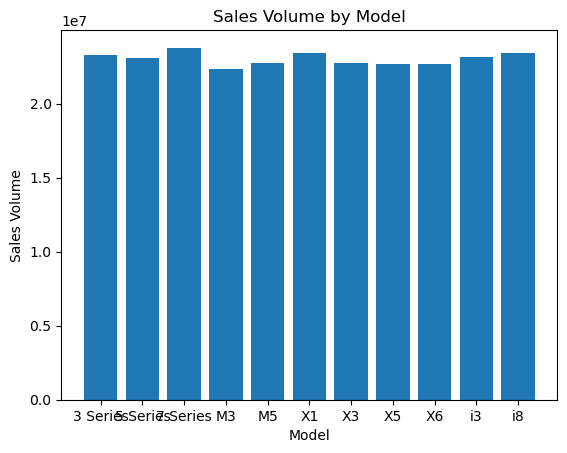

In [80]:
test = data[["Model","Sales_Volume"]].groupby("Model").sum()

plt.bar(test.index,test["Sales_Volume"])
plt.xlabel("Model")
plt.ylabel("Sales Volume")
plt.title("Sales Volume by Model")
plt.show()


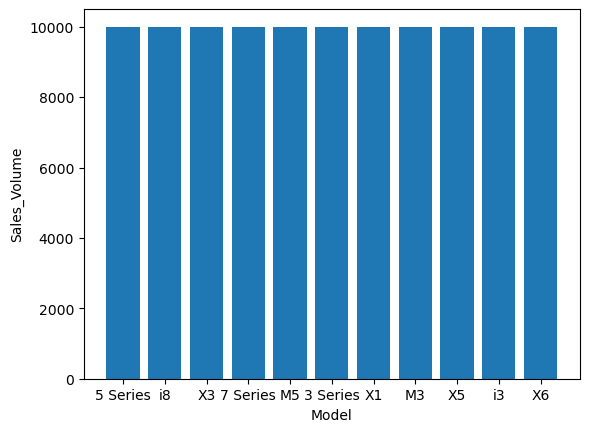

In [54]:
plt.bar(data['Model'],data['Sales_Volume'])
plt.xlabel('Model')
plt.ylabel('Sales_Volume')
plt.show()

In [13]:
# Identifying Objects- need to be converted to ML Friendly format
data.select_dtypes("object")

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification
0,5 Series,Asia,Red,Petrol,Manual,High
1,i8,North America,Red,Hybrid,Automatic,Low
2,5 Series,North America,Blue,Petrol,Automatic,Low
3,X3,Middle East,Blue,Petrol,Automatic,Low
4,7 Series,South America,Black,Diesel,Manual,Low
...,...,...,...,...,...,...
49995,i3,Asia,Red,Hybrid,Manual,High
49996,i3,Middle East,Silver,Electric,Manual,High
49997,5 Series,Middle East,Red,Petrol,Automatic,High
49998,i3,Asia,White,Electric,Automatic,High


In [79]:
list(data["Model"].unique())

# Label encode data points in Model column 
le=LabelEncoder()
data['Model_Encoded'] = le.fit_transform(data["Model"])

# Label encode data points in Region column 
data["Region_Encoded"] = le.fit_transform(data["Region"])

# Label encode data points in Color colum
data["Color_Encoded"] = le.fit_transform(data["Color"])

# Label encode data points in Fuel_Type colum
data["Fuel_Type_Encoded"] = le.fit_transform(data["Fuel_Type"])

# Label encode data points in Transmission colum




data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Model_Encoded
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,1
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,10
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,1
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,6
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,2


In [85]:
data['Region'].unique()

array(['Asia', 'North America', 'Middle East', 'South America', 'Europe',
       'Africa'], dtype=object)